In [8]:
# Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

# ML
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.3f' % x)


## Attribute Information

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

In [2]:
# Loading Dataset
heart = pd.read_csv('./datasets/heart.csv')

# Inspecting Dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Dataset info
print('#' * 50)
print('Total Rows:', heart.shape[0])
print('Total Columns:', heart.shape[1])
print('#' * 50, '\n')
heart.info(memory_usage=False)
print('\n')
print('#' * 50)

##################################################
Total Rows: 1025
Total Columns: 14
################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

##################################################


In [4]:
print('#' * 35)
print('Fixing Data Type')
print('#' * 35)
fix_dtype          = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart[fix_dtype]   = heart[fix_dtype].astype(object)
print(heart[fix_dtype].dtypes)
print('#' * 35)

###################################
Fixing Data Type
###################################
sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
dtype: object
###################################


In [5]:
# Dataset info
print('#' * 35)
print('Checking NULL Values ')
print('#' * 35)
print(heart.isna().sum())
print('#' * 35,)

###################################
Checking NULL Values 
###################################
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
###################################


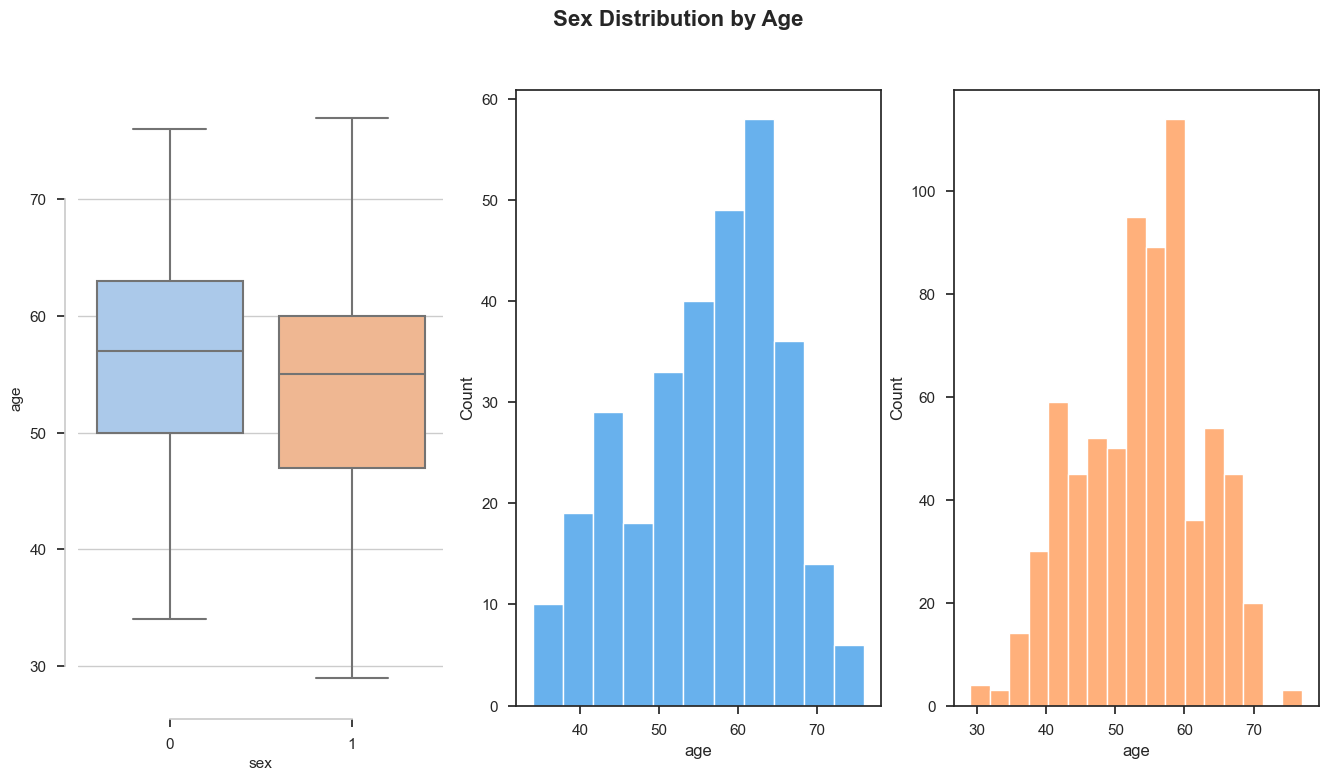

In [6]:
plt.figure(figsize=(16, 8))
plt.suptitle('Sex Distribution by Age', 
             fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif'
            )
glabel = ['Female', 'Male']
# --- Boxplot
plt.subplot(1, 3, 1)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x='sex', y='age',data=heart, dodge=False)
sns.despine(offset=10, trim=True)

plt.subplot(1, 3, 2)
sns.histplot(data=heart[heart.sex == 0], x=heart.age[heart.sex == 0], color='#3597e8',label ='Female')

plt.subplot(1, 3, 3)
sns.histplot(data=heart[heart.sex == 1], x=heart.age[heart.sex == 1], color='#ff964f', label='Male')

plt.show()

In [11]:
#Descriptive Statistics
print('#' * 64)
print('Descriptive Statistics')
print('#' * 64)
heart.select_dtypes(exclude='object').describe()

################################################################
Descriptive Statistics
################################################################


,age,trestbps,chol,thalach,oldpeak,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,131.612,246.000,149.114,1.072,0.513
std,9.072,17.517,51.593,23.006,1.175,0.500
min,29.000,94.000,126.000,71.000,0.000,0.000
25%,48.000,120.000,211.000,132.000,0.000,0.000
50%,56.000,130.000,240.000,152.000,0.800,1.000
75%,61.000,140.000,275.000,166.000,1.800,1.000
max,77.000,200.000,564.000,202.000,6.200,1.000


# We need to add more EDA before starting to applying ML Models